**Data exploration and understanding**

**1.1 Review of the overall data structure**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import shapiro
import missingno as msno
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import levene
import pingouin as pg
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import joblib

In [111]:
# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

**Loading the dataset and displaying general information**

In [112]:
print("data description")
print(data.DESCR)

data description
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, usi

**data dimensions**

In [113]:
print(f"\n dimension (rows, columns): {df.shape}")


 dimension (rows, columns): (20640, 9)


**variable types (numerical, categorical, textual)**

In [114]:
print("\n variable types:")
print(df.dtypes.value_counts())


 variable types:
float64    9
Name: count, dtype: int64


In [115]:
print("\n variable types:")
print(df.dtypes)


 variable types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [116]:
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("\n numeric variables:", list(numeric_cols))
print("\n non-numeric variables:", list(non_numeric_cols))



 numeric variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

 non-numeric variables: []


**sample of the data : first and last records**

In [117]:
print("\n first samples of data:")
print(df.head())
print("\n last samples of data:")
print(df.tail())


 first samples of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

 last samples of data:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638 

**1.2 Descriptive statistical analysis**

**Calculation of central statistics : mean, median, mode**

In [118]:

from sklearn.datasets import fetch_california_housing
print("Central Tendency Measures:")
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])

Central Tendency Measures:
Mean:
 MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

Median:
 MedInc            3.534800
HouseAge         29.000000
AveRooms          5.229129
AveBedrms         1.048780
Population     1166.000000
AveOccup          2.818116
Latitude         34.260000
Longitude      -118.490000
MedHouseVal       1.797000
dtype: float64

Mode:
 MedInc           3.12500
HouseAge        52.00000
AveRooms         5.00000
AveBedrms        1.00000
Population     891.00000
AveOccup         3.00000
Latitude        34.06000
Longitude     -118.31000
MedHouseVal      5.00001
Name: 0, dtype: float64


**Calculation of dispersion statistics : standard deviation, range, interquartile range**

In [119]:
print("\nDispersion Measures:")
print("Standard Deviation:\n", df.std(numeric_only=True))
print("\nRange:\n", df.max(numeric_only=True) - df.min(numeric_only=True))
print("\nInterquartile Range (IQR):\n", df.quantile(0.75) - df.quantile(0.25))


Dispersion Measures:
Standard Deviation:
 MedInc            1.899822
HouseAge         12.585558
AveRooms          2.474173
AveBedrms         0.473911
Population     1132.462122
AveOccup         10.386050
Latitude          2.135952
Longitude         2.003532
MedHouseVal       1.153956
dtype: float64

Range:
 MedInc            14.500200
HouseAge          51.000000
AveRooms         141.062937
AveBedrms         33.733333
Population     35679.000000
AveOccup        1242.641026
Latitude           9.410000
Longitude         10.040000
MedHouseVal        4.850020
dtype: float64

Interquartile Range (IQR):
 MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64


**skewness and kurtosis of variable distributions**

In [120]:
print("\nSkewness:")
print(df.skew(numeric_only=True))

print("\nKurtosis:")
print(df.kurtosis(numeric_only=True))


Skewness:
MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

Kurtosis:
MedInc             4.952524
HouseAge          -0.800629
AveRooms         879.353264
AveBedrms       1636.711972
Population        73.553116
AveOccup       10651.010636
Latitude          -1.117760
Longitude         -1.330152
MedHouseVal        0.327870
dtype: float64


**minimum and maximum values of each variable**

In [121]:
print("\nMinimum Values:")
print(df.min(numeric_only=True))

print("\nMaximum Values:")
print(df.max(numeric_only=True))


Minimum Values:
MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

Maximum Values:
MedInc            15.000100
HouseAge          52.000000
AveRooms         141.909091
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000010
dtype: float64


**1.3 Analysis of the target variable**

**Distribution of property prices**

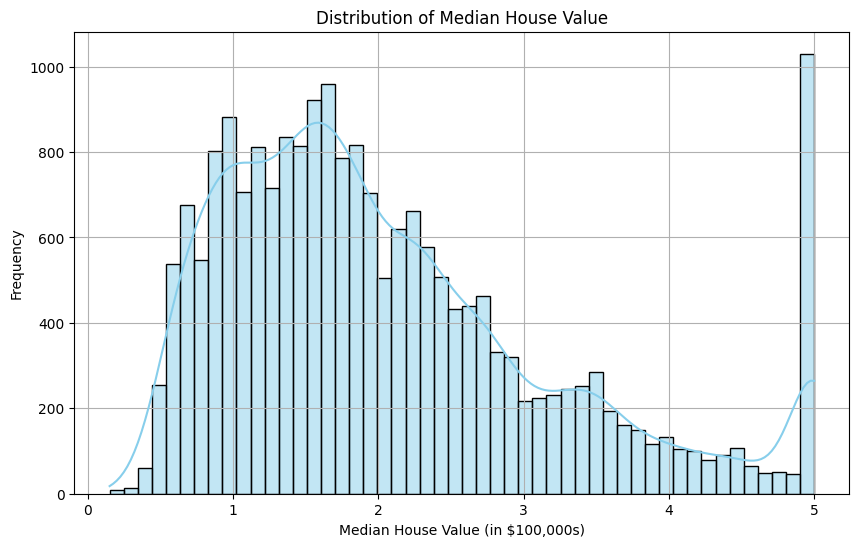

In [122]:
target = 'MedHouseVal'

# 1. Distribution of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(df[target], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Range of prices**

In [123]:
min_val = df[target].min()
max_val = df[target].max()
print(f"Range of Median House Value: ${min_val * 100000:.2f} to ${max_val * 100000:.2f}")

Range of Median House Value: $14999.00 to $500001.00


**Normality test : Shapiro-Wilk**

In [124]:
shapiro_test = stats.shapiro(df[target].sample(500))  # Use a sample (Shapiro is slow on large datasets)
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("\n→ The target variable is likely normally distributed (p > 0.05)")
else:
    print("\n→ The target variable is likely not normally distributed (p ≤ 0.05)")


Shapiro-Wilk Test:
Statistic=0.9113, p-value=0.0000

→ The target variable is likely not normally distributed (p ≤ 0.05)


**Q-Q Plot**

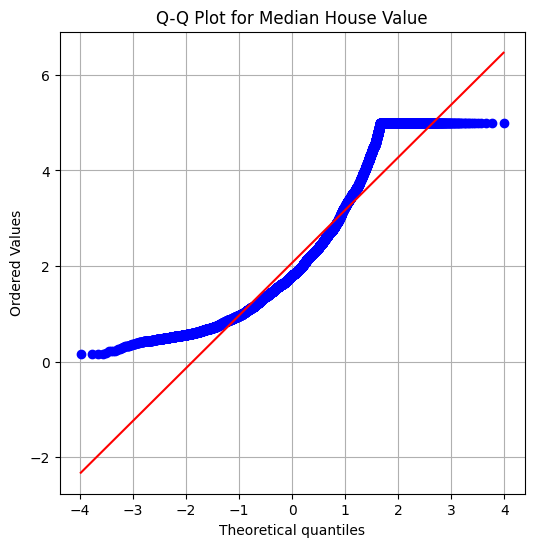

In [125]:
plt.figure(figsize=(6, 6))
stats.probplot(df[target], dist="norm", plot=plt)
plt.title('Q-Q Plot for Median House Value')
plt.grid(True)
plt.show()

**unusual prices**

In [126]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
print(f"\nNumber of unusual price entries : {outliers.shape[0]}")


Number of unusual price entries : 1071


**2- Data Processin**

**2.1 Missing Values**

In [127]:
df_missing = df.copy()
np.random.seed(42)
for col in ['AveRooms', 'HouseAge', 'MedInc']:
    df_missing.loc[df_missing.sample(frac=0.05).index, col] = np.nan
print("Missing values per column:\n", df_missing.isnull().sum())

Missing values per column:
 MedInc         1032
HouseAge       1032
AveRooms       1032
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64


**Analyze missing data pattern**

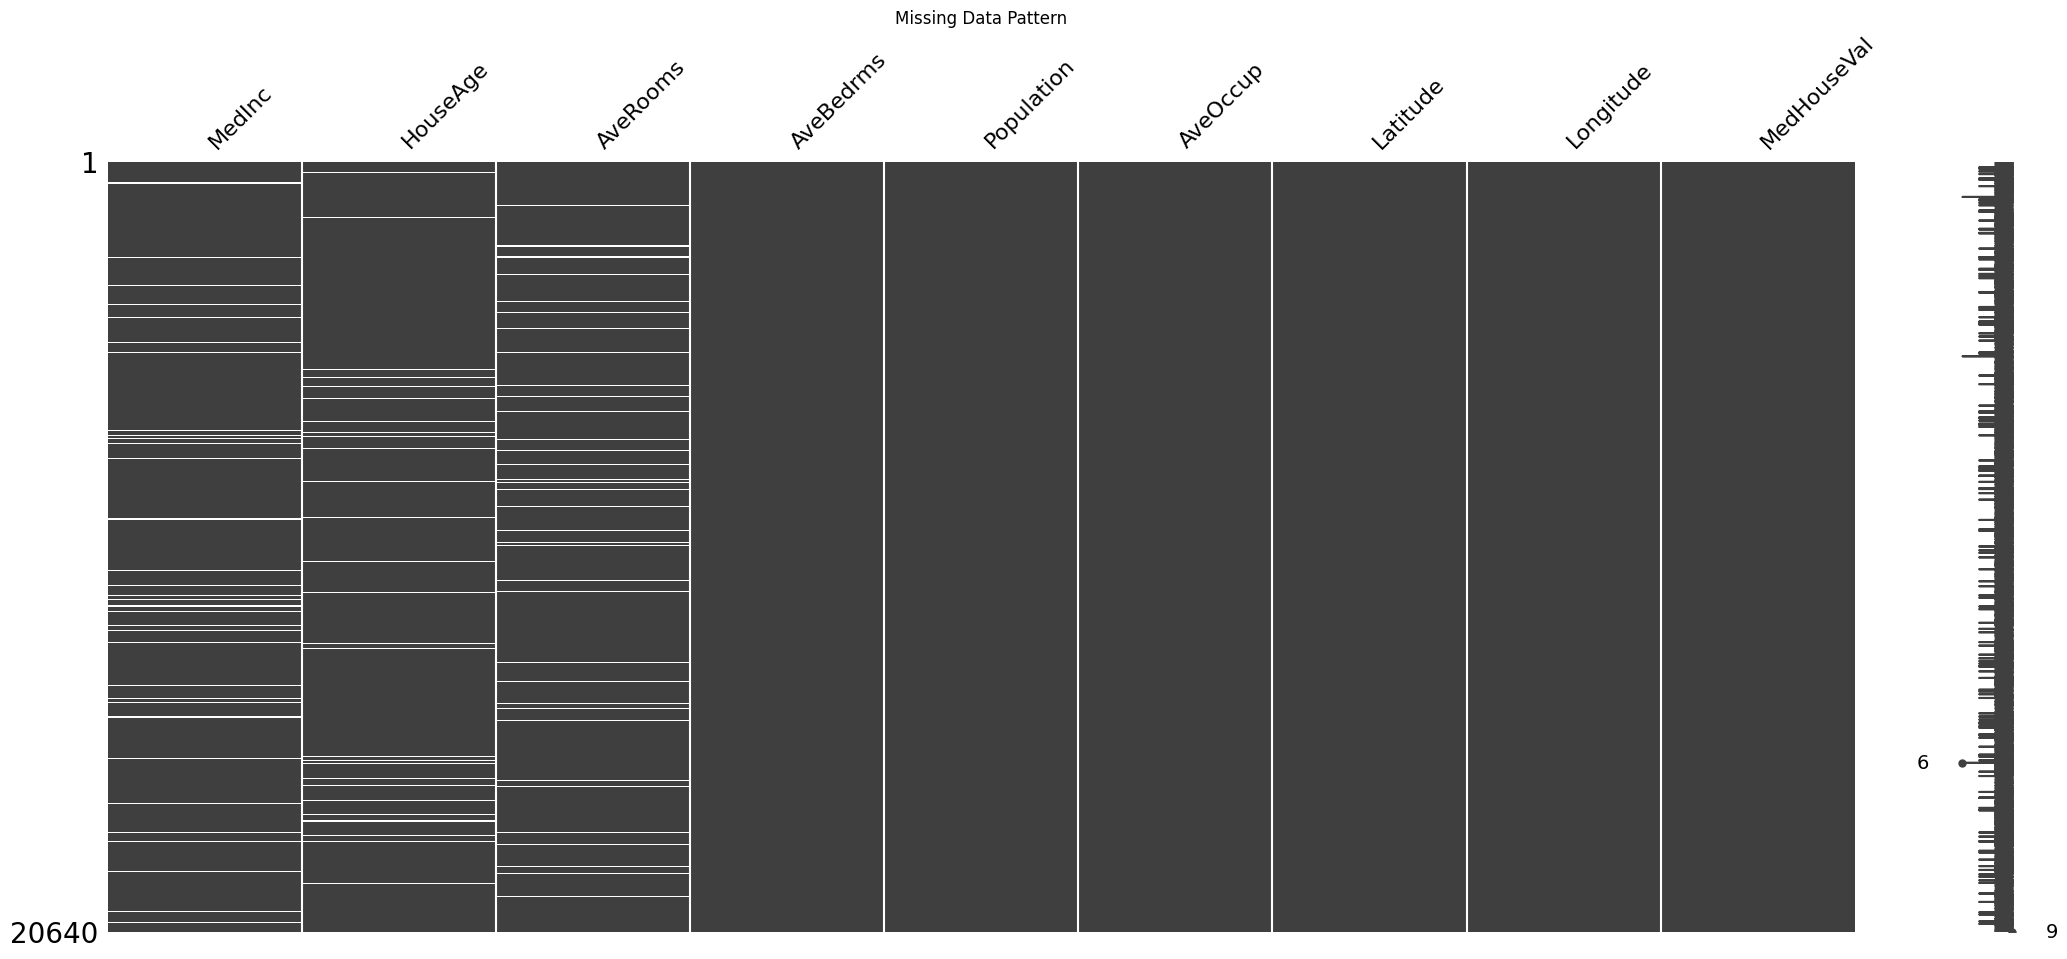

In [128]:
# Visualize missing data pattern
msno.matrix(df_missing)
plt.title("Missing Data Pattern")
plt.show()

**Imputation Methods**

Drop rows with missing values

In [129]:
df_drop = df_missing.dropna()
print("\nAfter dropping, shape =", df_drop.shape)


After dropping, shape = (17693, 9)


 Fill with mean, median, and mode

In [130]:
df_mean = df_missing.fillna(df_missing.mean(numeric_only=True))
df_median = df_missing.fillna(df_missing.median(numeric_only=True))
df_mode = df_missing.fillna(df_missing.mode(numeric_only=True).iloc[0])

print("\nAfter dropping, df_mean.shape =", df_mean.shape)
print("\nAfter dropping, df_median.shape =", df_median.shape)
print("\nAfter dropping, df_mode.shape =", df_mode.shape)


After dropping, df_mean.shape = (20640, 9)

After dropping, df_median.shape = (20640, 9)

After dropping, df_mode.shape = (20640, 9)


KNN Imputation

In [131]:
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df.columns)

Regression Imputation

In [132]:
df_reg = df_missing.copy()

# Drop rows where any predictor column is NaN
regression_data = df_reg.dropna(subset=['AveRooms', 'MedInc', 'HouseAge', 'AveOccup'])

# Use only clean columns for prediction
X_train = regression_data[['MedInc', 'HouseAge', 'AveOccup']]
y_train = regression_data['AveRooms']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Find rows where 'AveRooms' is missing, but predictors are NOT missing
to_impute = df_reg[df_reg['AveRooms'].isnull()]
to_impute = to_impute.dropna(subset=['MedInc', 'HouseAge', 'AveOccup'])

# Predict and fill
X_missing = to_impute[['MedInc', 'HouseAge', 'AveOccup']]
predicted = model.predict(X_missing)
df_reg.loc[X_missing.index, 'AveRooms'] = predicted

Compare Imputation Performance

In [133]:
# Compare one column with ground truth (example: 'AveRooms')
original = df['AveRooms']

# MSE of imputations (only where we had inserted missing values)
mask_missing = df_missing['AveRooms'].isnull()

rmse_mean = np.sqrt(mean_squared_error(original[mask_missing], df_mean.loc[mask_missing, 'AveRooms']))
rmse_median = np.sqrt(mean_squared_error(original[mask_missing], df_median.loc[mask_missing, 'AveRooms']))
rmse_knn = np.sqrt(mean_squared_error(original[mask_missing], df_knn.loc[mask_missing, 'AveRooms']))
rmse_reg = np.sqrt(mean_squared_error(original.loc[X_missing.index], df_reg.loc[X_missing.index, 'AveRooms']))

print("\nRMSE Comparison on 'AveRooms' (only on missing rows):")
print(f"Mean Imputation:   {rmse_mean:.4f}")
print(f"Median Imputation: {rmse_median:.4f}")
print(f"KNN Imputation:    {rmse_knn:.4f}")
print(f"Regression:        {rmse_reg:.4f}")


RMSE Comparison on 'AveRooms' (only on missing rows):
Mean Imputation:   1.6808
Median Imputation: 1.6879
KNN Imputation:    1.5665
Regression:        1.4170


**2.2 Outlier Detection and Management**

Outliers detection with IQR Method

In [134]:
# Working with a copy of the dataset
df_out = df.copy()

# Target variable for demonstration
target = 'MedHouseVal'

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

iqr_outliers = detect_outliers_iqr(df_out, target)
print(f"IQR method detected {len(iqr_outliers)} outliers in '{target}'")


IQR method detected 1071 outliers in 'MedHouseVal'


Outliers detection with Z-Score Method

In [135]:
z_scores = np.abs(stats.zscore(df_out[target]))
z_threshold = 3
z_outliers = df_out[z_scores > z_threshold]
print(f"Z-Score method detected {len(z_outliers)} outliers in '{target}'")

Z-Score method detected 0 outliers in 'MedHouseVal'


Detect Outliers with Isolation Forest

In [136]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # assuming 1% outliers
df_out['anomaly'] = iso_forest.fit_predict(df_out[[target]])
iso_outliers = df_out[df_out['anomaly'] == -1]
print(f"Isolation Forest detected {len(iso_outliers)} outliers in '{target}'")

Isolation Forest detected 207 outliers in 'MedHouseVal'


Keep or Remove Outliers

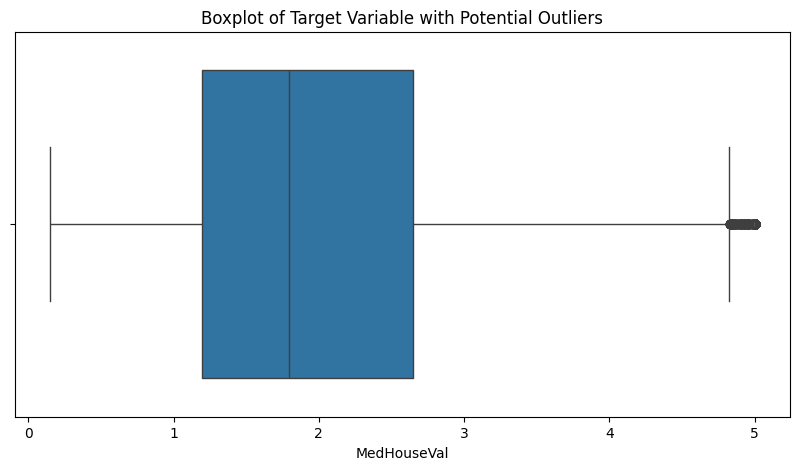

Data shape after removing outliers: (20433, 9)


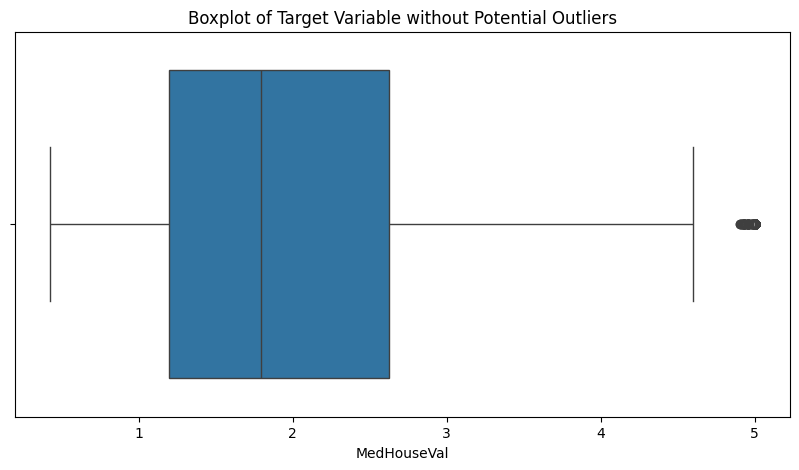

In [137]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_out[target])
plt.title("Boxplot of Target Variable with Potential Outliers")
plt.show()

df_cleaned = df_out[df_out['anomaly'] != -1].drop(columns=['anomaly'])
print(f"Data shape after removing outliers: {df_cleaned.shape}")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned[target])
plt.title("Boxplot of Target Variable without Potential Outliers")
plt.show()

Impact of Outliers on Model Performance


In [138]:
X = df_out.drop(columns=[target, 'anomaly'], errors='ignore')
y = df_out[target]

# Split data for original
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Model on original data
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE with outliers: {rmse_orig:.4f}")

# Model on cleaned data
X_clean = df_cleaned.drop(columns=[target])
y_clean = df_cleaned[target]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, random_state=42, test_size=0.2)

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)
rmse_clean = np.sqrt(mean_squared_error(y_test_c, y_pred_c))
print(f"RMSE without outliers: {rmse_clean:.4f}")

RMSE with outliers: 0.7456
RMSE without outliers: 0.7188


**2.3 Data Transformation and Normalization**

Text(0.5, 1.0, 'Original Distribution of AveRooms')

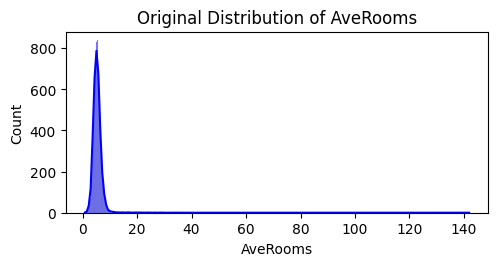

In [139]:
df_norm = df.copy()

# Select a numeric feature to transform for demonstration (e.g., 'AveRooms')
feature = 'AveRooms'

# Plot original distribution
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
sns.histplot(df_norm[feature], kde=True, color='blue')
plt.title(f'Original Distribution of {feature}')

Mathematical Transformations

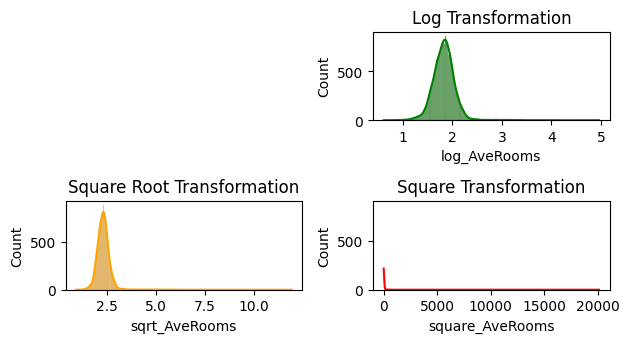

In [140]:
# Log transform (add small constant to avoid log(0))
df_norm['log_' + feature] = np.log1p(df_norm[feature])

# Square root transform
df_norm['sqrt_' + feature] = np.sqrt(df_norm[feature])

# Power transform (square)
df_norm['square_' + feature] = np.power(df_norm[feature], 2)

# Plot transformations
plt.subplot(3, 2, 2)
sns.histplot(df_norm['log_' + feature], kde=True, color='green')
plt.title('Log Transformation')

plt.subplot(3, 2, 3)
sns.histplot(df_norm['sqrt_' + feature], kde=True, color='orange')
plt.title('Square Root Transformation')

plt.subplot(3, 2, 4)
sns.histplot(df_norm['square_' + feature], kde=True, color='red')
plt.title('Square Transformation')

plt.tight_layout()
plt.show()

Scaling Methods

In [141]:
numeric_cols = df_norm.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove(feature)  # Remove original to avoid duplication
numeric_cols.append(feature)  # Keep feature for scaling

X = df_norm[numeric_cols].copy()

StandardScaler (mean=0, std=1)

In [142]:
scaler_standard = StandardScaler()
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)

In [143]:
print("Mean after scaling:\n", X_standard.mean())
print("\nStandard deviation after scaling:\n", X_standard.std())

Mean after scaling:
 MedInc             6.609700e-17
HouseAge           5.508083e-18
AveBedrms         -1.060306e-16
Population        -1.101617e-17
AveOccup           3.442552e-18
Latitude          -1.079584e-15
Longitude         -8.526513e-15
MedHouseVal        2.037991e-16
log_AveRooms      -8.592610e-16
sqrt_AveRooms      2.754042e-17
square_AveRooms    5.508083e-18
AveRooms           6.609700e-17
dtype: float64

Standard deviation after scaling:
 MedInc             1.000024
HouseAge           1.000024
AveBedrms          1.000024
Population         1.000024
AveOccup           1.000024
Latitude           1.000024
Longitude          1.000024
MedHouseVal        1.000024
log_AveRooms       1.000024
sqrt_AveRooms      1.000024
square_AveRooms    1.000024
AveRooms           1.000024
dtype: float64


 MinMaxScaler (scaled to [0,1])

In [144]:
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)

In [145]:
print("Original data stats:")
print(X.describe())

print("\nMinMax Scaled data stats:")
print(X_minmax.describe())

Original data stats:
             MedInc      HouseAge     AveBedrms    Population      AveOccup  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      1.096675   1425.476744      3.070655   
std        1.899822     12.585558      0.473911   1132.462122     10.386050   
min        0.499900      1.000000      0.333333      3.000000      0.692308   
25%        2.563400     18.000000      1.006079    787.000000      2.429741   
50%        3.534800     29.000000      1.048780   1166.000000      2.818116   
75%        4.743250     37.000000      1.099526   1725.000000      3.282261   
max       15.000100     52.000000     34.066667  35682.000000   1243.333333   

           Latitude     Longitude   MedHouseVal  log_AveRooms  sqrt_AveRooms  \
count  20640.000000  20640.000000  20640.000000  20640.000000   20640.000000   
mean      35.631861   -119.569704      2.068558      1.828722       2.302163   
std        2.135952      2.

RobustScaler (robust to outliers)

In [146]:
scaler_robust = RobustScaler()
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)
print(X_robust)

         MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude  \
0      2.197582  0.631579  -0.267221   -0.899787 -0.307981  0.957672   
1      2.186664 -0.421053  -0.822926    1.316631 -0.830800  0.952381   
2      1.707732  1.210526   0.263955   -0.714286 -0.018599  0.949735   
3      0.967177  1.210526   0.259814   -0.648188 -0.316908  0.949735   
4      0.142854  1.210526   0.345657   -0.640725 -0.746784  0.949735   
...         ...       ...        ...         ...       ...       ...   
20635 -0.905796 -0.210526   0.904821   -0.342217 -0.302057  1.380952   
20636 -0.448655 -0.578947   2.857330   -0.863539  0.357401  1.383598   
20637 -0.841709 -0.631579   0.763126   -0.169510 -0.577676  1.367725   
20638 -0.765007 -0.578947   1.317744   -0.453092 -0.815121  1.367725   
20639 -0.525816 -0.684211   1.214417    0.235608 -0.235929  1.351852   

       Longitude  MedHouseVal  log_AveRooms  sqrt_AveRooms  square_AveRooms  \
0      -0.986807     1.880448      0.956695       1.0089

Compare Scaled Distributions (for feature)

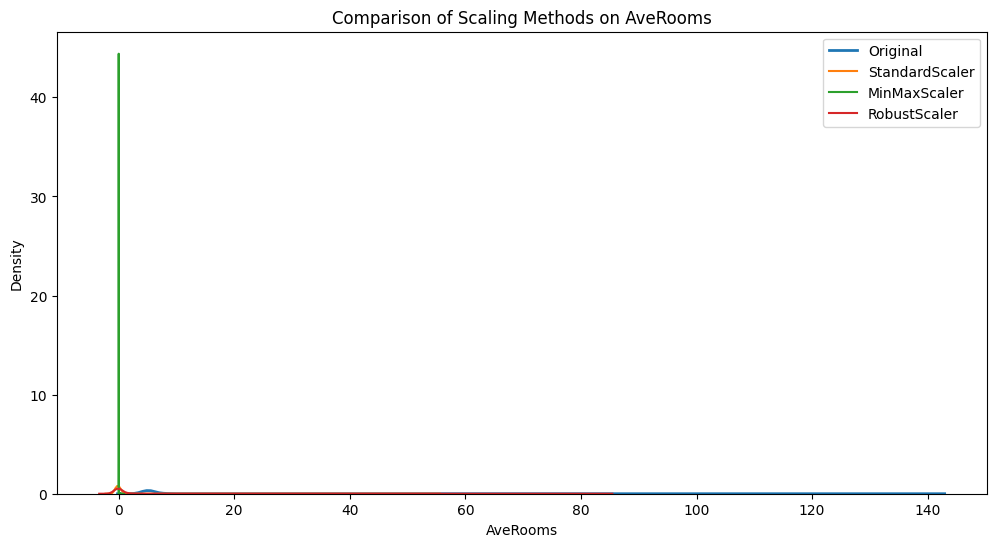

In [147]:
plt.figure(figsize=(12, 6))
sns.kdeplot(X[feature], label='Original', linewidth=2)
sns.kdeplot(X_standard[feature], label='StandardScaler')
sns.kdeplot(X_minmax[feature], label='MinMaxScaler')
sns.kdeplot(X_robust[feature], label='RobustScaler')
plt.title(f'Comparison of Scaling Methods on {feature}')
plt.legend()
plt.show()

**2.4 Feature Engineering**

 Create ratio-based features

In [148]:
df_add = df.copy()
df_add['RoomsPerPerson'] = df['AveRooms'] / df['AveOccup']
df_add['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']
print(df_add[['RoomsPerPerson', 'BedroomsPerRoom']].head())

   RoomsPerPerson  BedroomsPerRoom
0        2.732919         0.146591
1        2.956685         0.155797
2        2.957661         0.129516
3        2.283154         0.184458
4        2.879646         0.172096


Combine existing features to create new ones

In [149]:
df_add['RoomDensity'] = df_add['AveRooms'] * df_add['AveOccup']
df_add['IncomeRoomRatio'] = df_add['MedInc'] / (df_add['AveRooms'] + 1)
print(df_add[['RoomDensity', 'IncomeRoomRatio']].head())

   RoomDensity  IncomeRoomRatio
0    17.848325         1.042719
1    13.161483         1.146897
2    23.225510         0.781362
3    14.822293         0.827755
4    13.703657         0.528190


Binning continuous variables

In [150]:
df_add['IncomeLevel'] = pd.cut(df_add['MedInc'],
                           bins=[0, 2, 4, 6, 8, 10, np.inf],
                           labels=['Very Low', 'Low', 'Mid-Low', 'Medium', 'Mid-High', 'High'])
print(df_add[['MedInc', 'IncomeLevel']].head())

   MedInc IncomeLevel
0  8.3252    Mid-High
1  8.3014    Mid-High
2  7.2574      Medium
3  5.6431     Mid-Low
4  3.8462         Low


Create dummy variables for categorical data

In [151]:
df_add = pd.get_dummies(df_add, columns=['IncomeLevel'], drop_first=True)
print(df_add.filter(like='IncomeLevel_').head())

   IncomeLevel_Low  IncomeLevel_Mid-Low  IncomeLevel_Medium  \
0            False                False               False   
1            False                False               False   
2            False                False                True   
3            False                 True               False   
4             True                False               False   

   IncomeLevel_Mid-High  IncomeLevel_High  
0                  True             False  
1                  True             False  
2                 False             False  
3                 False             False  
4                 False             False  


Extract date-related features (if date column existed)

In [152]:
#df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['DayOfWeek'] = df['Date'].dt.dayofweek

In [153]:
print(df_add.head())
print("Shape:", df_add.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  RoomsPerPerson  BedroomsPerRoom  RoomDensity  \
0    -122.23        4.526        2.732919         0.146591    17.848325   
1    -122.22        3.585        2.956685         0.155797    13.161483   
2    -122.24        3.521        2.957661         0.129516    23.225510   
3    -122.25        3.413        2.283154         0.184458    14.822293   
4    -122.25        3.422        2.879646         0.172096    13.703657   

   IncomeRoomRatio  IncomeLevel_Low  IncomeLevel_Mid-Low  IncomeLevel_Medium  \
0         1.

**2.5 Feature Selection**

Remove Low-Variance Features


In [154]:
# Set a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
df_var = selector.fit_transform(df.select_dtypes(include=[np.number]))

# Get the selected column names
selected_columns = df.select_dtypes(include=[np.number]).columns[selector.get_support()]
df_selected = df[selected_columns]
print(df_selected.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Feature Selection Based on Correlation

In [155]:
# Correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_clean = df.drop(columns=to_drop)
print(df_clean.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   MedHouseVal  
0        4.526  
1        3.585  
2        3.521  
3        3.413  
4        3.422  


Filter Methods (Chi-square, ANOVA)

ANOVA F-test for regression

In [156]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Select top 8 features based on ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_columns = X.columns[selector.get_support()]
print("Selected features (ANOVA):", selected_columns)

Selected features (ANOVA): Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Wrapper Methods – Recursive Feature Elimination (RFE)

In [157]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

# Selected features
rfe_features = X.columns[rfe.support_]
print("Selected features (RFE):", rfe_features)

Selected features (RFE): Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Embedded Methods (Lasso)

In [158]:
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# Select non-zero coefficient features
lasso_selected = X.columns[lasso.coef_ != 0]
print("Selected features (Lasso):", lasso_selected)

Selected features (Lasso): Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


**3: Data Visualization**

**3.1 Univariate Visualizations**

Histogram for Numerical Variables

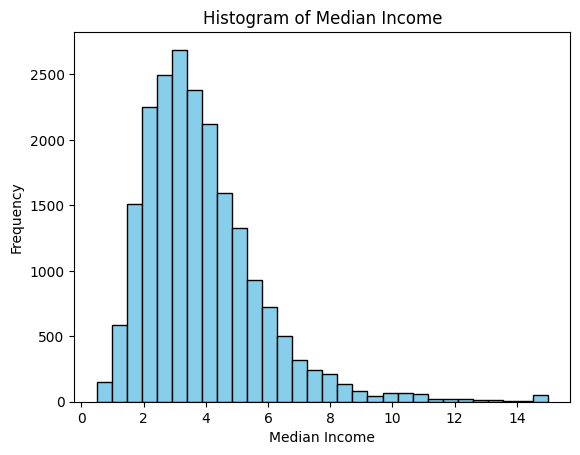

In [159]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Example: Histogram of Median Income
plt.hist(df['MedInc'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for each numeric column
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.tight_layout()
#     plt.show()

 Box Plot to Detect Outliers

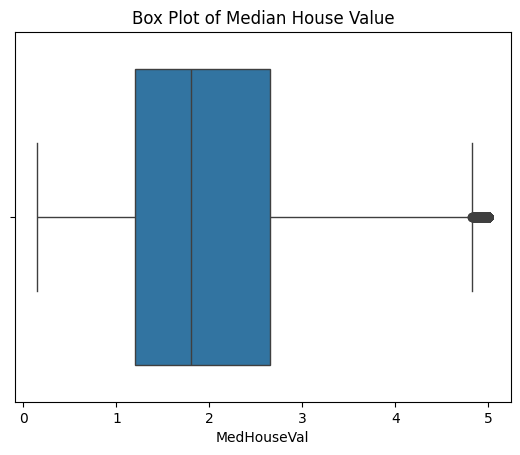

In [160]:
# Example: Box plot of Median House Value
sns.boxplot(x=df['MedHouseVal'])
plt.title('Box Plot of Median House Value')
plt.show()

Density Plot to Examine Distribution

<ipython-input-161-974695235>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AveRooms'], shade=True)


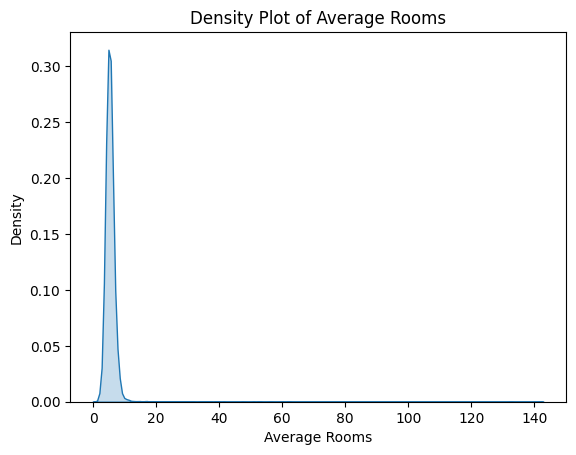

In [161]:
# Example: Density Plot of Median House Value
sns.kdeplot(df['AveRooms'], shade=True)
plt.title('Density Plot of Average Rooms')
plt.xlabel('Average Rooms')
plt.show()

Bar Chart for Categorical Variables

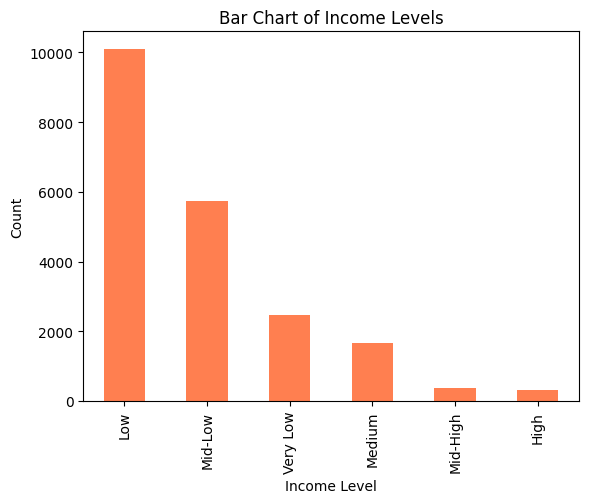

In [162]:
# Example: Bar chart for IncomeLevel (binned income)

# Make sure IncomeLevel is categorical
if 'IncomeLevel' not in df.columns:
    df['IncomeLevel'] = pd.cut(df['MedInc'],
                               bins=[0, 2, 4, 6, 8, 10, np.inf],
                               labels=['Very Low', 'Low', 'Mid-Low', 'Medium', 'Mid-High', 'High'])

df['IncomeLevel'].value_counts().plot(kind='bar', color='coral')
plt.title('Bar Chart of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

Pie Chart for Proportions

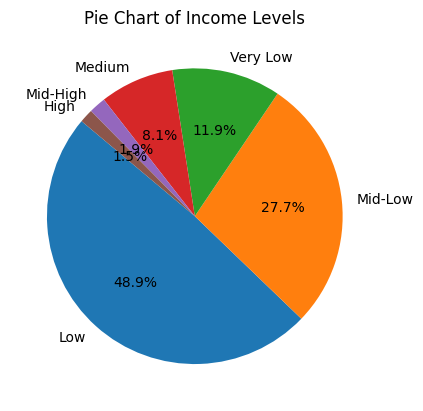

In [163]:
df['IncomeLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Income Levels')
plt.ylabel('')
plt.show()

**3.2 Bivariate Visualizations**

Scatter Plot between Features and Target Variable

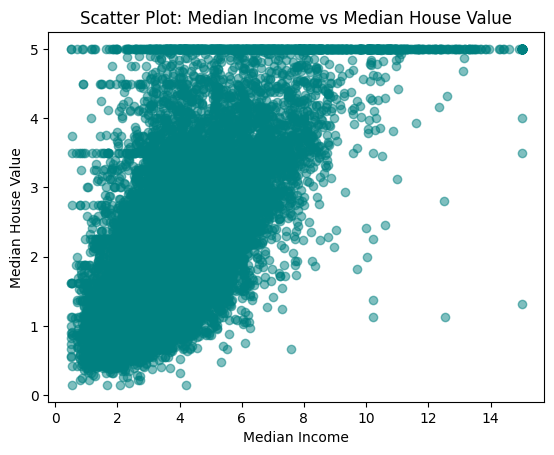

In [164]:
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, color='teal')
plt.title('Scatter Plot: Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Correlation Heatmap

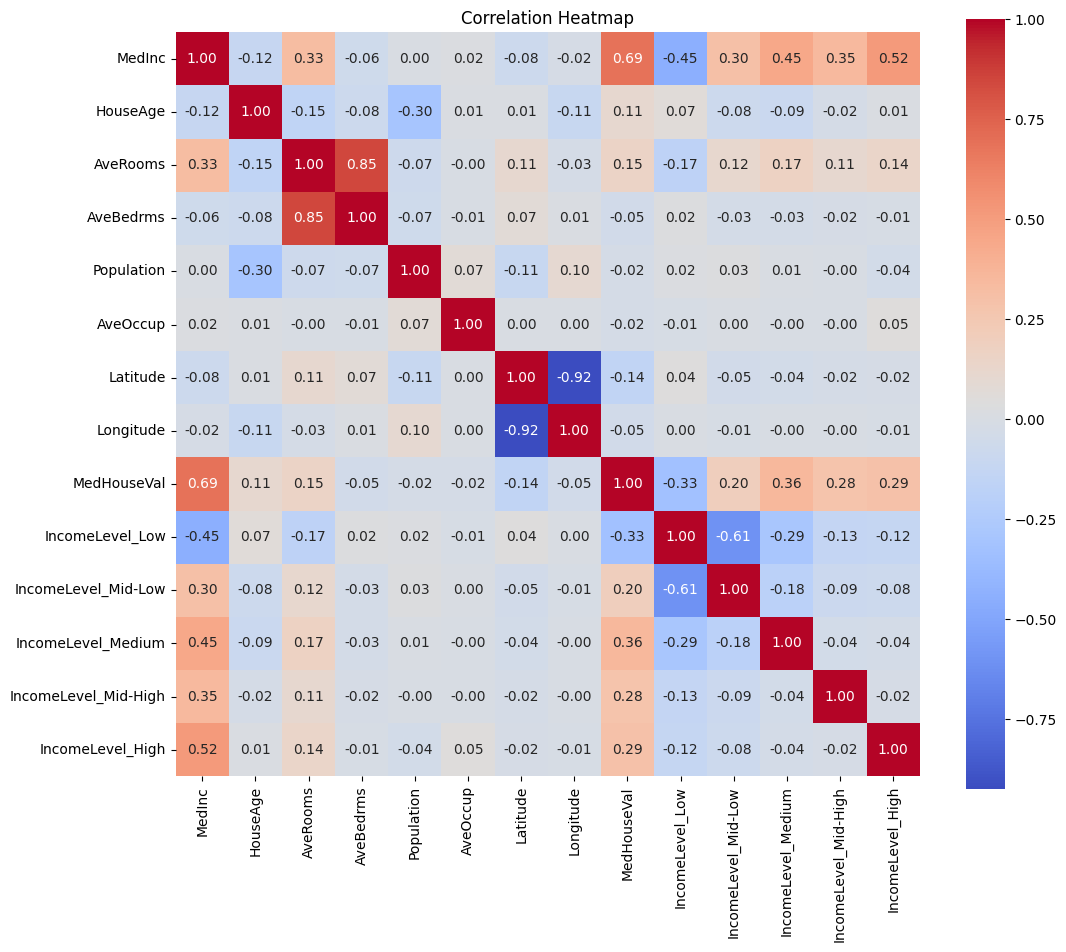

In [165]:
df = pd.get_dummies(df, columns=['IncomeLevel'], drop_first=True)
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [166]:
print(df.dtypes)

MedInc                  float64
HouseAge                float64
AveRooms                float64
AveBedrms               float64
Population              float64
AveOccup                float64
Latitude                float64
Longitude               float64
MedHouseVal             float64
IncomeLevel_Low            bool
IncomeLevel_Mid-Low        bool
IncomeLevel_Medium         bool
IncomeLevel_Mid-High       bool
IncomeLevel_High           bool
dtype: object


Grouped Box Plot

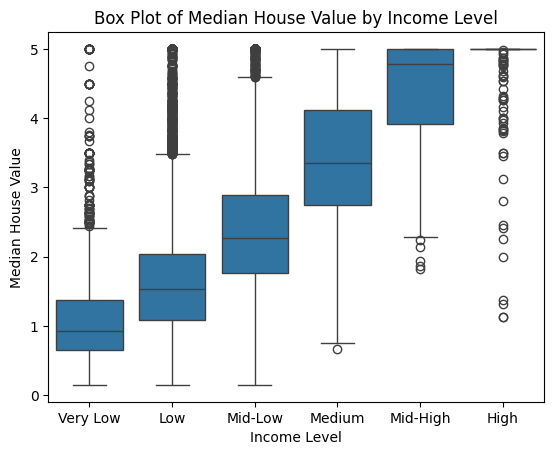

In [167]:
df['IncomeLevel'] = pd.cut(df['MedInc'],
                           bins=[0, 2, 4, 6, 8, 10, np.inf],
                           labels=['Very Low', 'Low', 'Mid-Low', 'Medium', 'Mid-High', 'High'])
sns.boxplot(x='IncomeLevel', y='MedHouseVal', data=df)
plt.title('Box Plot of Median House Value by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Median House Value')
plt.show()

 Line Plot for Trends

<ipython-input-168-1954393317>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bins = df.groupby('IncomeLevel')['MedHouseVal'].mean().reset_index()


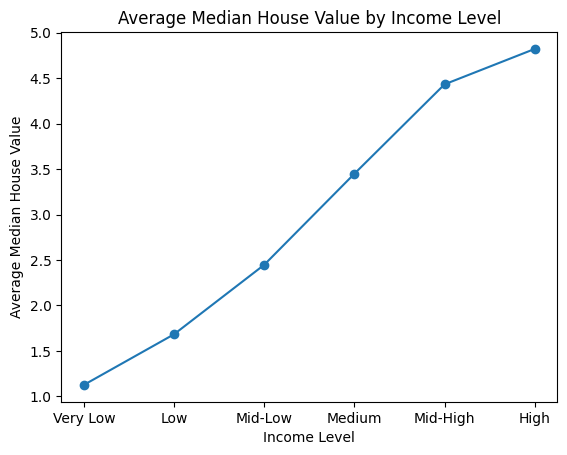

In [168]:
income_bins = df.groupby('IncomeLevel')['MedHouseVal'].mean().reset_index()

plt.plot(income_bins['IncomeLevel'], income_bins['MedHouseVal'], marker='o', linestyle='-')
plt.title('Average Median House Value by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Median House Value')
plt.show()

Violin Plot for Distribution by Groups

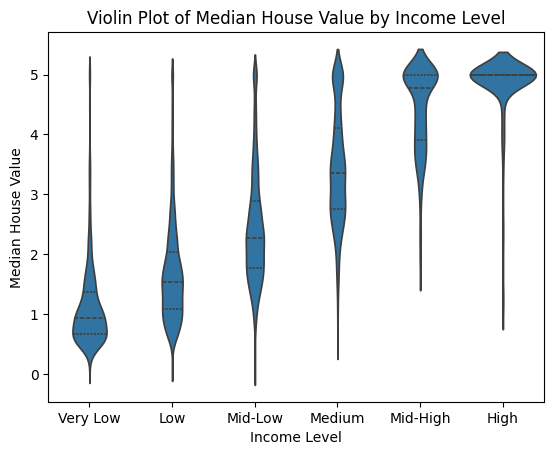

In [169]:
sns.violinplot(x='IncomeLevel', y='MedHouseVal', data=df, inner='quartile')
plt.title('Violin Plot of Median House Value by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Median House Value')
plt.show()

**3.3 Multivariate Visualizations**

Pair Plot (Scatterplot Matrix)

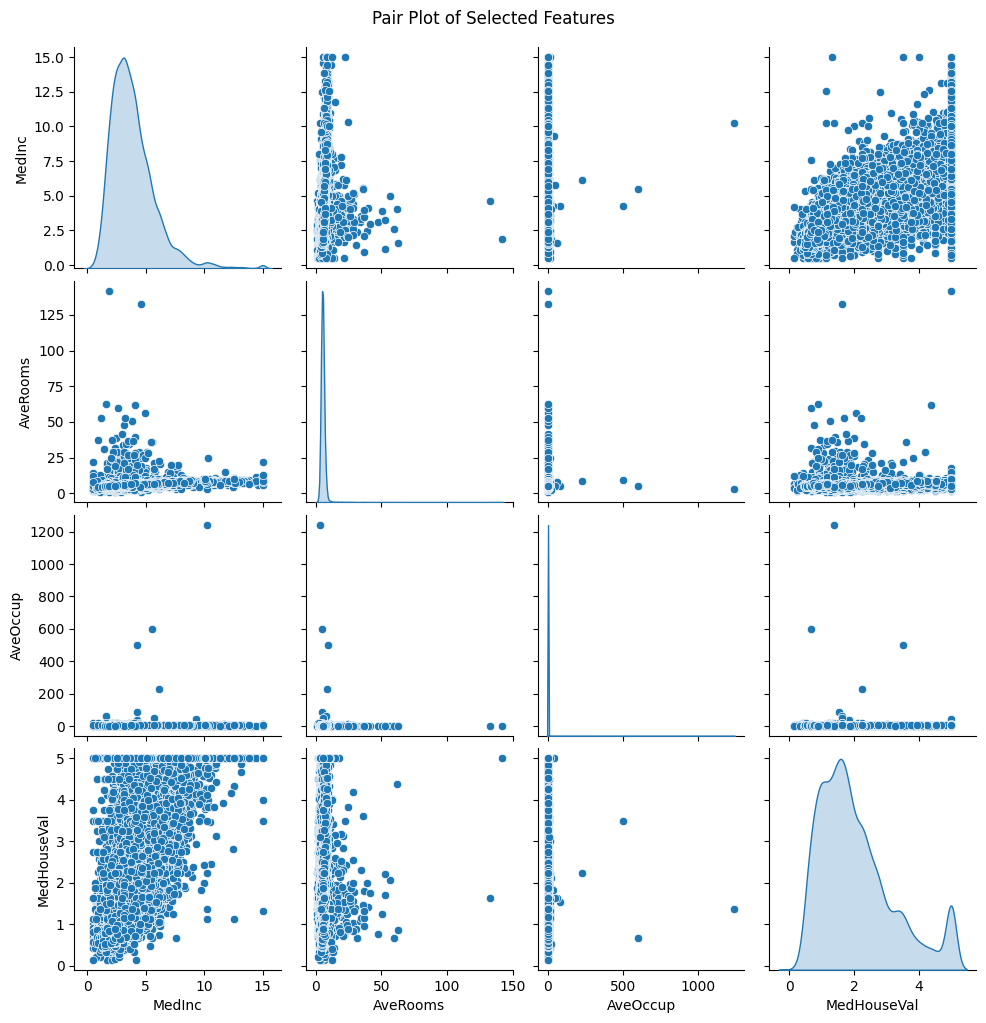

In [170]:
# Select a subset of features for readability
features = ['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal']

sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

Parallel Coordinates Plot

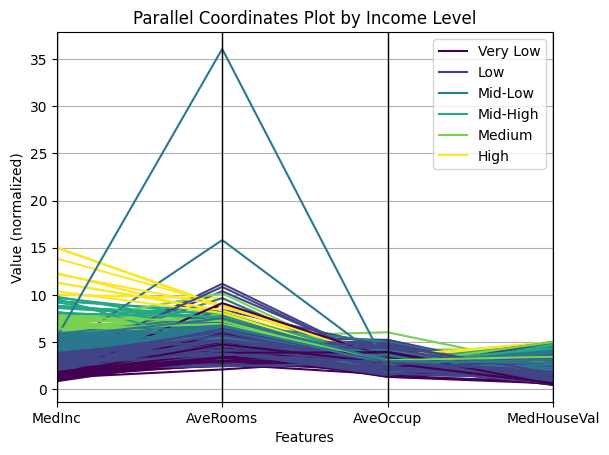

In [171]:
# Create a categorical feature for grouping (e.g., IncomeLevel)
# Ensure IncomeLevel exists as categorical
if 'IncomeLevel' not in df.columns:
    df['IncomeLevel'] = pd.cut(df['MedInc'],
                               bins=[0, 2, 4, 6, 8, 10, np.inf],
                               labels=['Very Low', 'Low', 'Mid-Low', 'Medium', 'Mid-High', 'High'])

# Sample data for plotting (parallel coordinates works better with smaller data)
sample_df = df[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal', 'IncomeLevel']].sample(500, random_state=42)

parallel_coordinates(sample_df, class_column='IncomeLevel', colormap='viridis')
plt.title('Parallel Coordinates Plot by Income Level')
plt.xlabel('Features')
plt.ylabel('Value (normalized)')
plt.show()

In [172]:
print(df.head(20))

    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5   4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6   3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7   3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8   2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9   3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10  3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11  3.2705      52.0  4.772480   1.024523      1504.0  2.049046     37.85   

3D Scatter Plot

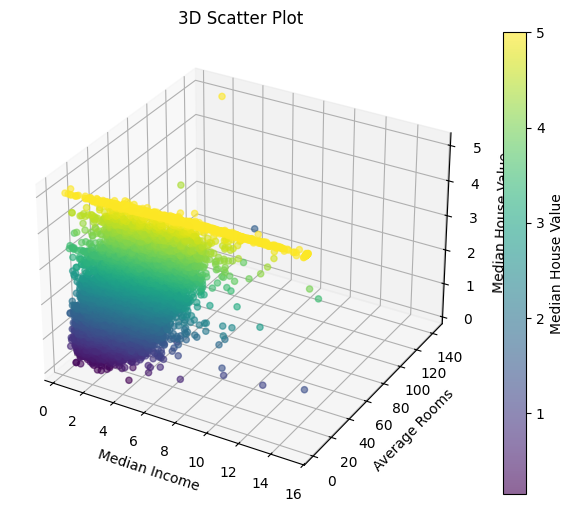

In [173]:
# upper_limit = df['AveRooms'].quantile(0.99)
# df = df[df['AveRooms'] <= upper_limit]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = df['MedInc']
y = df['AveRooms']
z = df['MedHouseVal']

scat = ax.scatter(x, y, z, c=df['MedHouseVal'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('Median House Value')
plt.title('3D Scatter Plot')

fig.colorbar(scat, ax=ax, label='Median House Value')
plt.show()

Advanced Heatmap with Clustering (Hierarchical Clustering Heatmap)

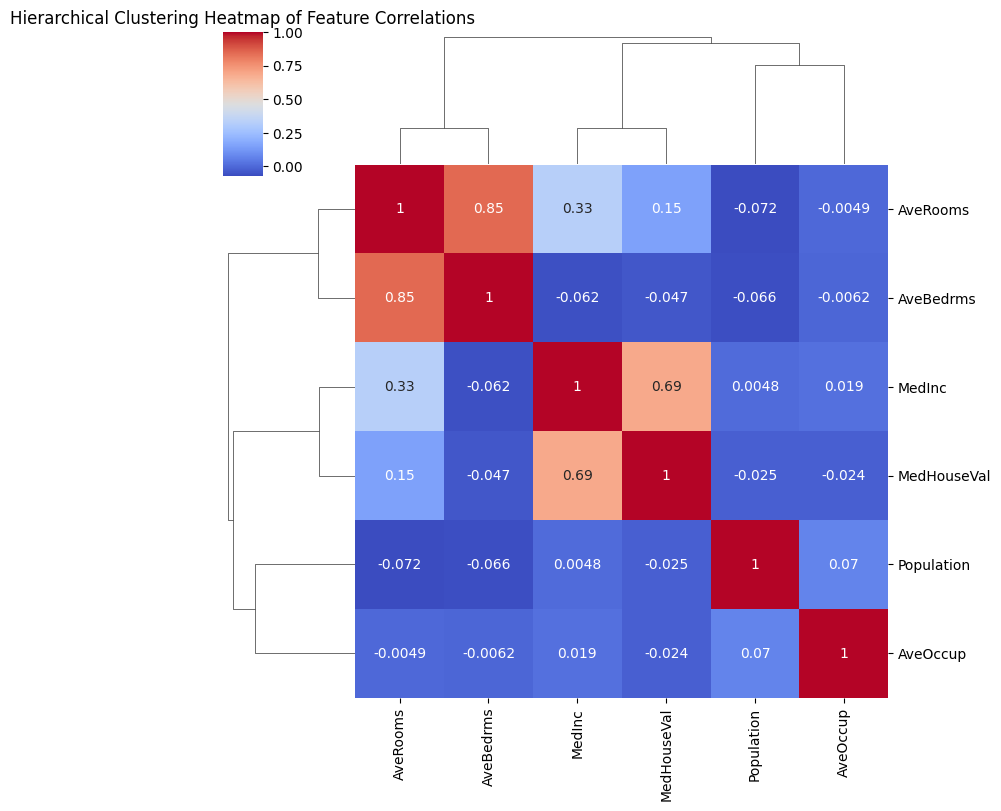

In [174]:
# Select numerical features for clustering
features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
sns.clustermap(df[features].corr(), annot=True, cmap='coolwarm', figsize=(8,8))
plt.title('Hierarchical Clustering Heatmap of Feature Correlations')
plt.show()

PCA (Principal Component Analysis) Plot

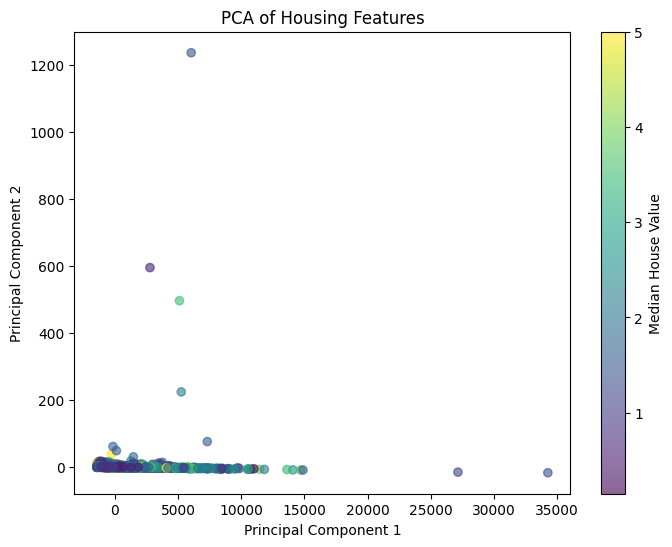

In [175]:
features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
X = df[features].dropna()

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(components[:, 0], components[:, 1], c=df.loc[X.index, 'MedHouseVal'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Features')
plt.show()

**3.4 Geographic and Spatial Visualizations**

Scatter Plot of Spatial Prices (Longitude & Latitude)

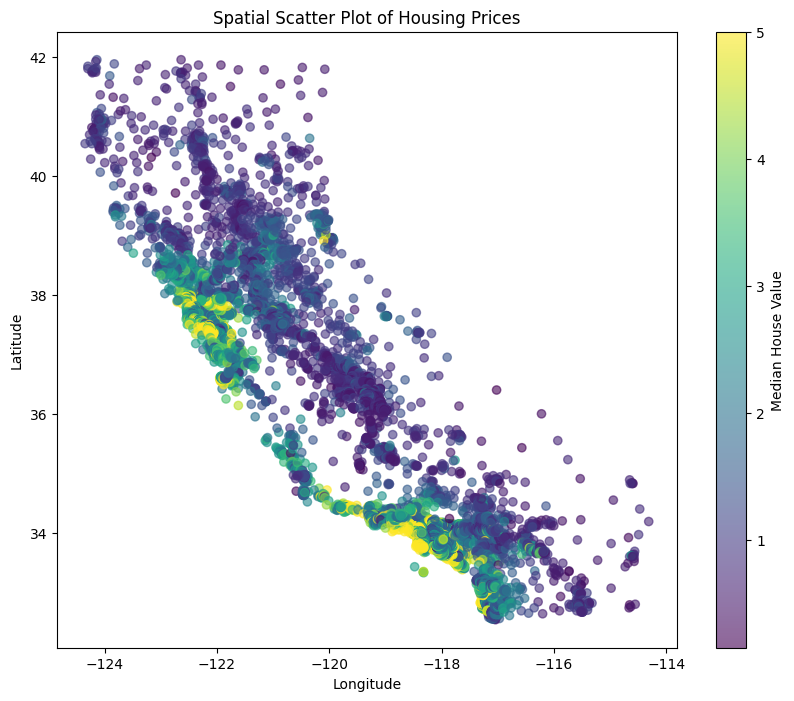

In [176]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Median House Value')
plt.title('Spatial Scatter Plot of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Geographic Heatmap (using seaborn.kdeplot)

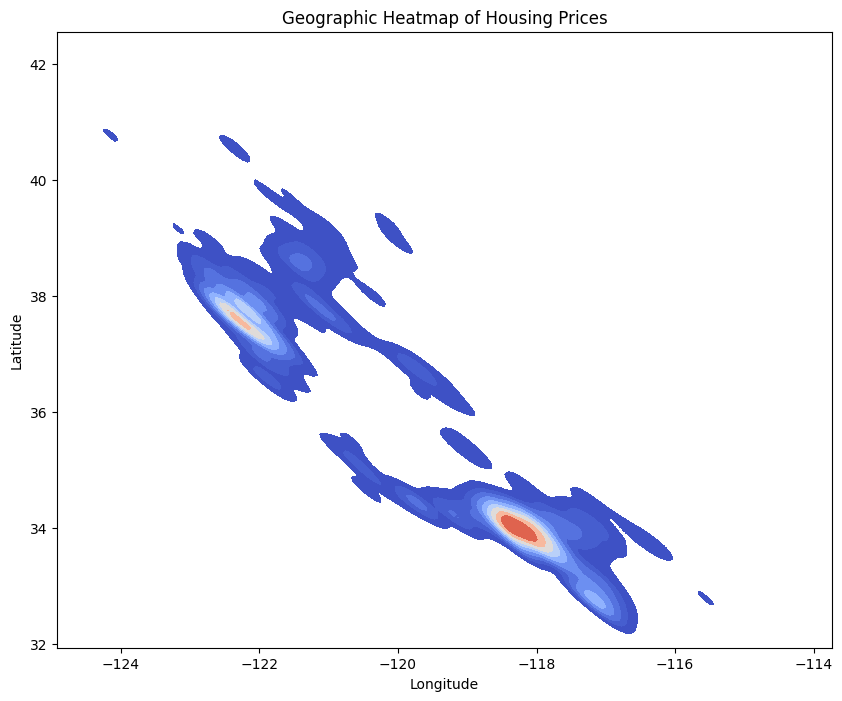

In [177]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], weights=df['MedHouseVal'], cmap='coolwarm', fill=True, bw_adjust=0.5)
plt.title('Geographic Heatmap of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Spatial Clustering (KMeans Clustering on Coordinates)

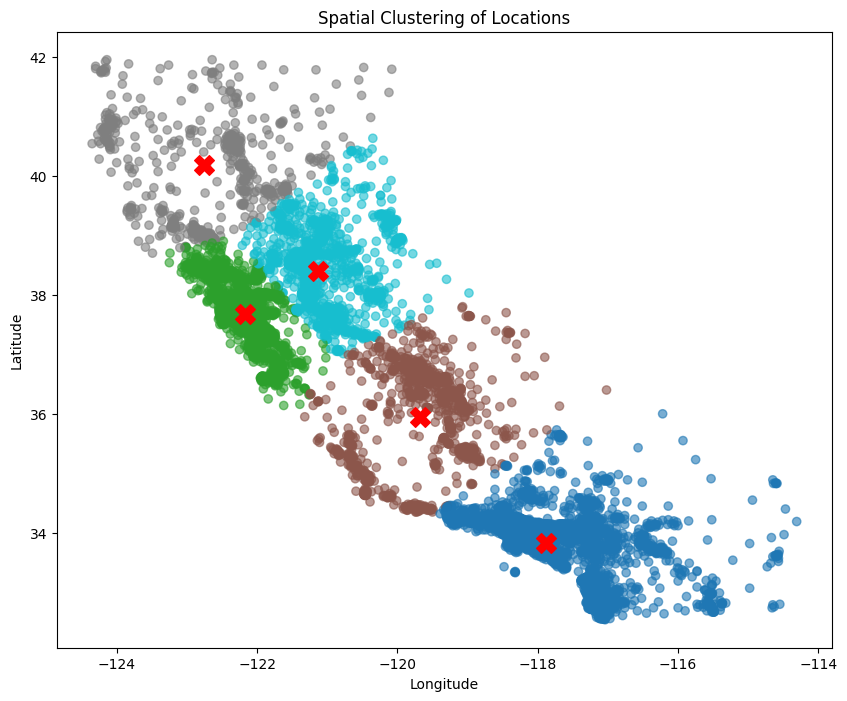

In [178]:
coords = df[['Longitude', 'Latitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(coords)

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=clusters, cmap='tab10', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Spatial Clustering of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Density Plot of Points (Spatial Density)

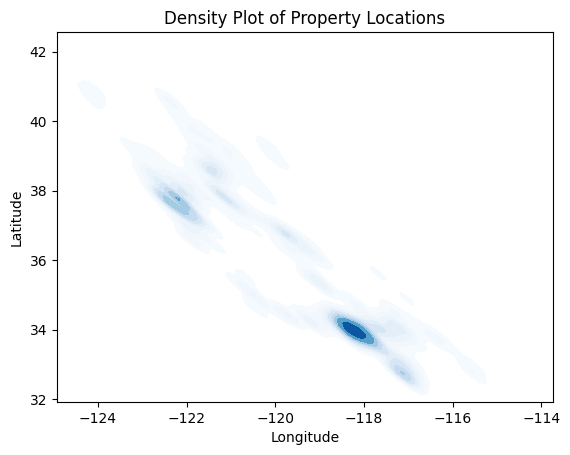

In [179]:
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], fill=True, cmap='Blues', bw_adjust=0.5)
plt.title('Density Plot of Property Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Regional Trend Visualization (Average Price by Cluster)

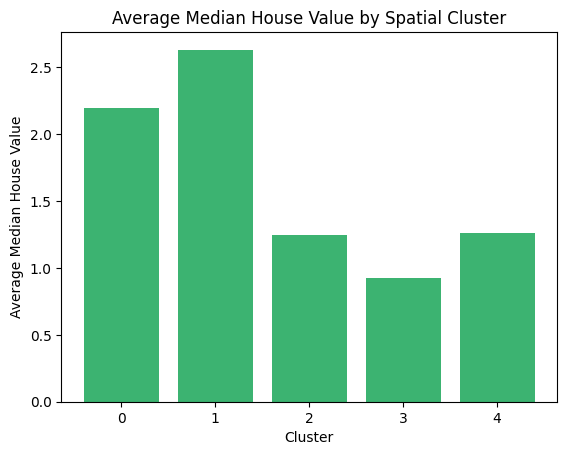

In [180]:
df['Cluster'] = clusters
cluster_means = df.groupby('Cluster')['MedHouseVal'].mean().reset_index()

plt.bar(cluster_means['Cluster'], cluster_means['MedHouseVal'], color='mediumseagreen')
plt.title('Average Median House Value by Spatial Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Median House Value')
plt.show()

**4.1 Advanced Correlation Analysis**

Calculate Different Correlations (Pearson, Spearman, Kendall)

In [181]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Pearson Correlation (linear)
pearson_corr = numeric_cols.corr(method='pearson')

# Spearman Correlation (rank-based)
spearman_corr = numeric_cols.corr(method='spearman')

# Kendall Correlation (rank-based, robust to ties)
kendall_corr = numeric_cols.corr(method='kendall')

print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)
print("\nKendall Correlation:\n", kendall_corr)

Pearson Correlation:
                MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   
Cluster     -0.187749 -0.108935  0.116798   0.094281   -0.105072  0.003195   

             Latitude  Longitude  MedHouseVal   Cluster  
MedInc      -0.079809  -0.015176     0.688075 -0.187749  
Hou

Detect Multicollinearity using Variance Inflation Factor (VIF)

In [182]:
X = numeric_cols.dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

       Feature          VIF
0       MedInc    19.808359
1     HouseAge     7.752296
2     AveRooms    48.663632
3    AveBedrms    45.905415
4   Population     2.955350
5     AveOccup     1.099585
6     Latitude  1493.439821
7    Longitude  1417.415510
8  MedHouseVal     9.489506
9      Cluster     5.088429


Partial Correlation Analysis

In [183]:
# Partial correlation between 'MedInc' and 'MedHouseVal' controlling for 'AveRooms' and 'Population'
pcorr = pg.partial_corr(data=df, x='MedInc', y='MedHouseVal', covar=['AveRooms', 'Population'])
print(pcorr)

             n         r         CI95%  p-val
pearson  20640  0.684248  [0.68, 0.69]    0.0


Identify Non-Linear Relationships

Scatter plot with lowess smoothing:

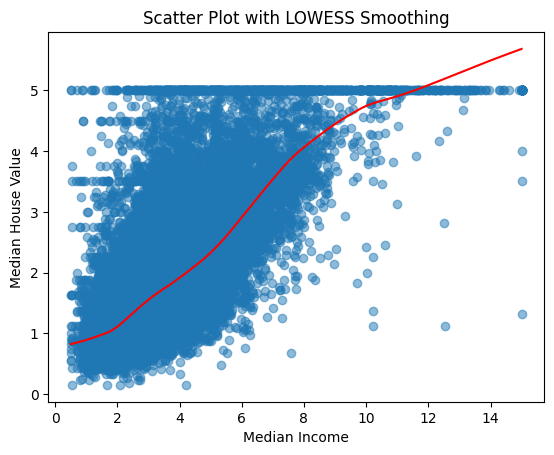

In [184]:

lowess = sm.nonparametric.lowess

x = df['MedInc']
y = df['MedHouseVal']

z = lowess(y, x, frac=0.3)

plt.scatter(x, y, alpha=0.5)
plt.plot(z[:, 0], z[:, 1], color='red')
plt.title('Scatter Plot with LOWESS Smoothing')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Mutual Information (for feature-target non-linear dependency):

In [185]:
X = df.drop('MedHouseVal', axis=1).select_dtypes(include='number')
y = df['MedHouseVal']

mi = mutual_info_regression(X.fillna(0), y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_series)

Mutual Information Scores:
 Longitude     0.399482
MedInc        0.388024
Latitude      0.369923
Cluster       0.177355
AveRooms      0.103321
AveOccup      0.073451
HouseAge      0.031830
AveBedrms     0.024091
Population    0.021170
dtype: float64


**4.2 Distribution Analysis and Statistical Tests**

Shapiro-Wilk Test

In [186]:
stat, p = shapiro(df['MedHouseVal'].dropna())
print(f'Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.3f}')

if p > 0.05:
    print("\n✅ Data is likely normal")
else:
    print("\n❌ Data is not normally distributed")

Shapiro-Wilk Test: Statistic=0.912, p-value=0.000

❌ Data is not normally distributed


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Kolmogorov-Smirnov Test (against normal distribution)

In [187]:
data = df['MedHouseVal'].dropna()
stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
print(f'K-S Test: Statistic={stat:.3f}, p-value={p:.3f}')

if p > 0.05:
    print("\n✅ Data is likely normal")
else:
    print("\n❌ Data is not normally distributed")

K-S Test: Statistic=0.103, p-value=0.000

❌ Data is not normally distributed


Homogeneity of Variance

In [188]:

# Step 1: Create the two groups
group1 = df[df['IncomeLevel'] == 'Low']['MedHouseVal']
group2 = df[df['IncomeLevel'] == 'High']['MedHouseVal']

# Step 2: Perform Levene’s test for equal variances
stat, p = levene(group1.dropna(), group2.dropna())

# Step 3: Print the test statistic and p-value
print(f'Levene’s Test: Statistic={stat:.3f}, p-value={p:.3f}')


# Step 4: Interpret the result
if p > 0.05:
    print("\n✅ The variances are not significantly different (assumption of equal variances holds).")
else:
    print("\n❌ The variances are significantly different (variances are not equal).")


Levene’s Test: Statistic=155.087, p-value=0.000

❌ The variances are significantly different (variances are not equal).


Group Comparison Tests

Independent t-test (2 groups)

In [189]:

# Divide the data into two groups based on income level
group1 = df[df['IncomeLevel'] == 'Low']['MedHouseVal']
group2 = df[df['IncomeLevel'] == 'High']['MedHouseVal']

# Perform independent t-test (Welch’s t-test)
stat, p = ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)

# Show results
print(f"T-test Statistic: {stat:.3f}, P-value: {p:.3f}")

# Interpret the result
if p < 0.05:
    print("\n✅ The difference between the two group means is statistically significant.")
else:
    print("\n❌ There is no statistically significant difference between the two group means.")

T-test Statistic: -89.872, P-value: 0.000

✅ The difference between the two group means is statistically significant.


ANOVA (more than 2 groups)

In [190]:
groups = [df[df['IncomeLevel'] == lvl]['MedHouseVal'].dropna() for lvl in df['IncomeLevel'].unique()]
stat, p = f_oneway(*groups)
print(f'ANOVA: Statistic={stat:.3f}, p-value={p:.3f}')

# Interpret the result
if p < 0.05:
    print("\n✅ The difference between the two group means is statistically significant.")
else:
    print("\n❌ There is no statistically significant difference between the two group means.")

ANOVA: Statistic=3278.253, p-value=0.000

✅ The difference between the two group means is statistically significant.


Residual Distribution Analysis

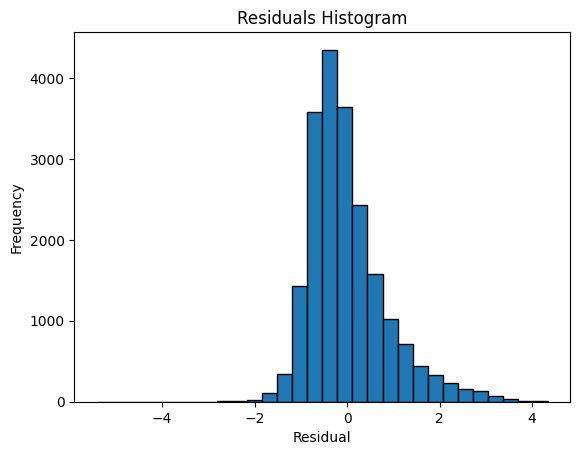

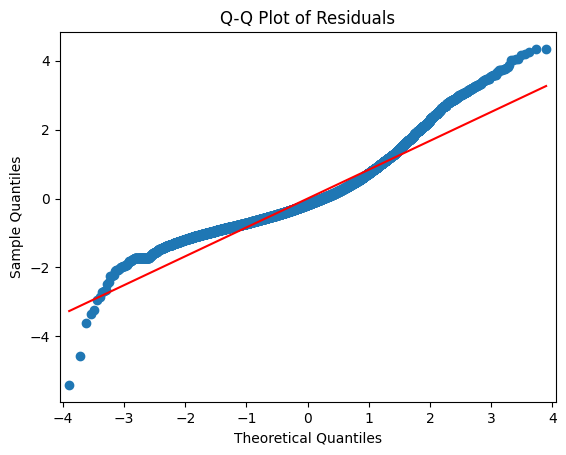

In [191]:
X = df[['MedInc']]
y = df['MedHouseVal']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

**4.3 Feature Importance Analysis**

Feature Importance using Random Forest

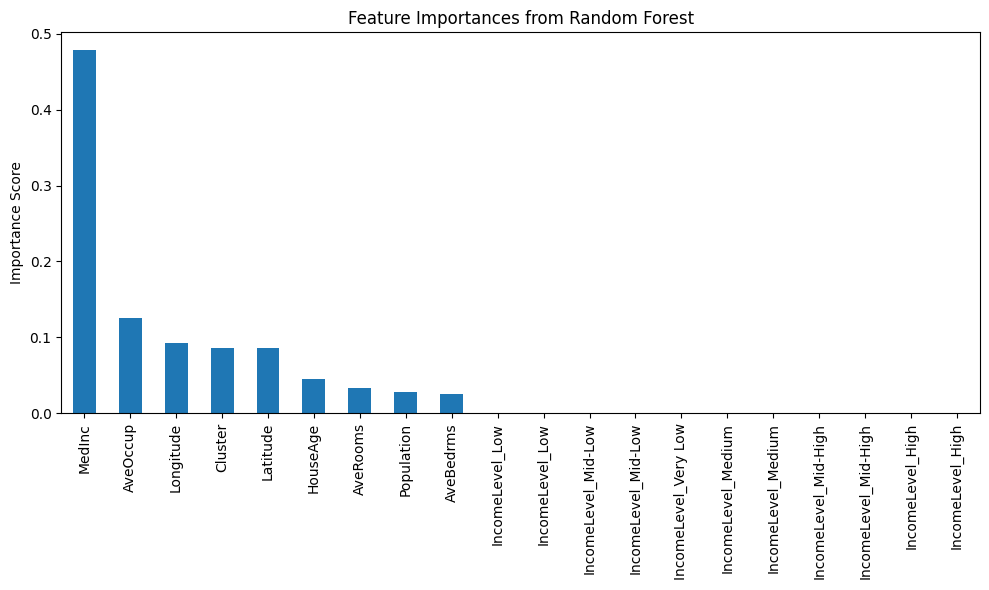

In [192]:
# X: features, y: target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# One-hot encoding if needed
X = pd.get_dummies(X)

# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

Sensitivity Analysis (Partial Dependence Plots)

Check how the target changes when one feature changes and others stay fixed.

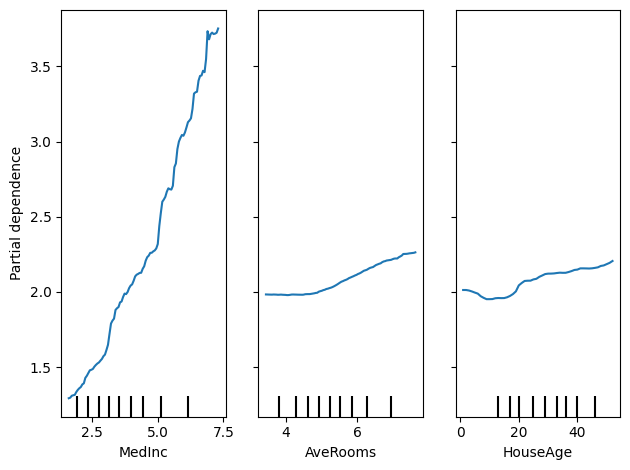

In [193]:

X = X.loc[:, ~X.columns.duplicated()]
features_to_plot = ['MedInc', 'AveRooms', 'HouseAge']  # example features
PartialDependenceDisplay.from_estimator(model, X, features_to_plot)
plt.tight_layout()
plt.show()

Feature Ranking with SelectKBest

Use statistical tests to rank top features.

In [194]:

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

# Show top features
print("Top Ranked Features:\n", scores.head(10))

Top Ranked Features:
 MedInc                  18556.571631
IncomeLevel_Medium       2976.642269
IncomeLevel_Low          2484.670267
Cluster                  2338.236322
IncomeLevel_Very Low     2049.937341
IncomeLevel_High         1948.273782
IncomeLevel_Mid-High     1773.518066
IncomeLevel_Mid-Low       885.560820
AveRooms                  487.757462
Latitude                  438.005453
dtype: float64


Feature Interaction Analysis

Check how combinations of features affect the prediction using interaction terms.

Example: Add interaction term and retrain model

In [ ]:
#X['MedInc_x_AveRooms'] = X['MedInc'] * X['AveRooms']
X.loc[:, 'MedInc_x_AveRooms'] = X['MedInc'] * X['AveRooms']
model.fit(X, y)

# Check if interaction improves model performance
y_pred = model.predict(X)
print("R² with interaction term:", r2_score(y, y_pred))

**5.1 Data Splitting for Modeling**

Train / Validation / Test Split

In [ ]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# One-hot encode if needed
X = pd.get_dummies(X)

# First, split into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Then split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

Stratified Split (for classification tasks or binned target in regression)

If the target is continuous (like housing price), you can bin it for stratified sampling:

In [ ]:
# Create bins of target variable
y_binned = pd.qcut(y, q=5, labels=False)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, random_state=42)

Avoiding Data Leakage

Data leakage occurs when information from outside the training dataset is used to create the model.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

 Create Cross-Validation Folds

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}:")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

**5.2 Preprocessing Pipeline**

Build a Complete Preprocessing Pipeline

In [ ]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Numeric transformer: fill missing + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer: fill missing + encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Final pipeline (preprocessing + model)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

Save and Load the Pipeline

In [ ]:

# Save pipeline
joblib.dump(model_pipeline, 'housing_pipeline.pkl')

# Load pipeline
loaded_pipeline = joblib.load('housing_pipeline.pkl')

Validate the Pipeline

In [ ]:
scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Full Pipeline Documentation:

- **Numeric Features:**
  - Imputation: Median
  - Scaling: StandardScaler

- **Categorical Features:**
  - Imputation: Most Frequent
  - Encoding: OneHotEncoder

- **Model:**
  - RandomForestRegressor

- **Tools:**
  - Pipeline, ColumnTransformer
  - Saved using `joblib.dump()`

**5.3 Final Data Quality Check**

Final Missing Values Check

Check for any remaining null values in training, validation, or test sets:

In [ ]:
print("Missing values in X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_val:", pd.DataFrame(X_val).isnull().sum().sum())
print("Missing values in X_test:", pd.DataFrame(X_test).isnull().sum().sum())

Final Outlier Check

Example with boxplot

In [ ]:
# Plot one example feature from unscaled data
sns.boxplot(x=X['AveRooms'])
plt.title("Boxplot for AveRooms")
plt.show()

Z-score based outlier detection

In [ ]:
z_scores = zscore(X[numeric_features])
outliers = (abs(z_scores) > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

Value Range Validation

In [ ]:
def validate_value_ranges(df):
    print("🔍 Value Range Validation Report:")
    for col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        num_neg = (df[col] < 0).sum()

        print(f"\n🟦 Column: {col}")
        print(f"   ➤ Min: {min_val}")
        print(f"   ➤ Max: {max_val}")
        print(f"   ➤ Negative values: {num_neg}")

        # Example of specific checks based on column names
        if "age" in col.lower() or "year" in col.lower():
            if min_val < 0:
                print("   ⚠ Warning: Negative age/year detected!")
        if "rooms" in col.lower() or "inc" in col.lower():
            if min_val <= 0:
                print("   ⚠ Warning: Values should be > 0")

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_val_df   = pd.DataFrame(X_val)
X_test_df  = pd.DataFrame(X_test)

print("🔍 Missing values in X_train:", X_train_df.isnull().sum().sum())
print("🔍 Missing values in X_val:  ", X_val_df.isnull().sum().sum())
print("🔍 Missing values in X_test: ", X_test_df.isnull().sum().sum())

Class Balance Check

In [ ]:
# For example: bin target into 3 price levels
y_binned = pd.qcut(y, q=3, labels=["Low", "Mid", "High"])
print(y_binned.value_counts())